In [1]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Leemos el archivo de dataset
df = pd.read_excel('RUTA DEL ARCHIVO')

In [3]:
#Vemos el archivo
df.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount,Total Discount,Order Total,Shipping Cost,Total
0,4293-1,2014-09-02,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,...,156.50,300.97,144.47,23.0,4533.52,2,194.83,4757.22,7.18,4291.55
1,5001-1,2015-10-24,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,...,0.24,1.26,1.02,8.0,45.20,3,0.00,45.90,0.70,46.91
2,5004-1,2014-03-13,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,...,42.11,80.98,38.87,45.0,873.32,4,72.23,837.57,7.18,82.58
3,5009-1,2013-02-18,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,...,5.33,8.60,3.27,16.0,73.52,1,4.35,740.67,6.19,730.92
4,5010-1,2014-09-13,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,...,1.53,2.78,1.25,49.0,138.46,7,5.95,123.77,1.34,125.97


I.II. Coversión de Datos.
Convertimos los datos en el formato adecuado para su análisis.

In [4]:
#Vemos la Información de las Columnas con sus tipos de datos.
print("Información de las columnas y tipos de datos:")
print(df.info())
print("\n")

Información de las columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order No           5000 non-null   object        
 1   Order Date         5000 non-null   datetime64[ns]
 2   Customer Name      5000 non-null   object        
 3   Address            4999 non-null   object        
 4   City               5000 non-null   object        
 5   State              5000 non-null   object        
 6   Customer Type      5000 non-null   object        
 7   Account Manager    5000 non-null   object        
 8   Order Priority     5000 non-null   object        
 9   Product Name       5000 non-null   object        
 10  Product Category   5000 non-null   object        
 11  Product Container  5000 non-null   object        
 12  Ship Mode          5000 non-null   object        
 13  Ship Date        

In [5]:
#Convierto la columna Discount de int64 a float64
df['Discount'] = df['Discount'].astype('float64')

In [6]:
# Convertir fechas 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

I.III. Verificamos los valores Nulos
Se verifican los valores nulos en Dataset

In [7]:
# Verificar valores nulos
print("Valores nulos por columna:")
nulls = df.isnull().sum()
print(nulls)

Valores nulos por columna:
Order No             0
Order Date           0
Customer Name        0
Address              1
City                 0
State                0
Customer Type        0
Account Manager      0
Order Priority       0
Product Name         0
Product Category     0
Product Container    0
Ship Mode            0
Ship Date            0
Cost Price           0
Retail Price         0
Profit Margin        0
Order Quantity       1
Sub Total            0
Discount             0
Total Discount       0
Order Total          0
Shipping Cost        0
Total                0
dtype: int64


Tenemos 2 valores nulos dentro del dataset, en esto caso es para la dirección (Address) y para la cantidad de un pedido (Order Quantity). En estos casos, como los registros son minimos y no resultan significativos para el análisis vamos a eliminarlos.

In [8]:
#Voy a eliminar ambos registros debido a que son minimos y no es significativo en el análisis

df.dropna(subset=['Order Quantity'], inplace=True)
df.dropna(subset=['Address'], inplace=True)

In [9]:
# Verifico por última vez los valores nulos
print("Valores nulos por columna:")
nulls = df.isnull().sum()
print(nulls)

Valores nulos por columna:
Order No             0
Order Date           0
Customer Name        0
Address              0
City                 0
State                0
Customer Type        0
Account Manager      0
Order Priority       0
Product Name         0
Product Category     0
Product Container    0
Ship Mode            0
Ship Date            0
Cost Price           0
Retail Price         0
Profit Margin        0
Order Quantity       0
Sub Total            0
Discount             0
Total Discount       0
Order Total          0
Shipping Cost        0
Total                0
dtype: int64


Excelente, ahora vamos a seguir con los valores duplicados.

I.IV. Validación de Registros Duplicados

In [10]:
# Verificar duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")
print("\n")

Número de filas duplicadas: 0




II. Estadistica Descriptiva y Gráficos

In [11]:
# Creamos las columnas de periodo, mes
df['periodo'] = df['Order Date'].dt.year
df['mes'] = df['Order Date'].dt.month
df['periodo_mes'] = df['Order Date'].dt.strftime('%Y-%m')


Ventas totales por año:
   periodo      Total
0     2013  766873.10
1     2014  992586.20
2     2015  995253.41
3     2016  890547.37
4     2017   76572.55


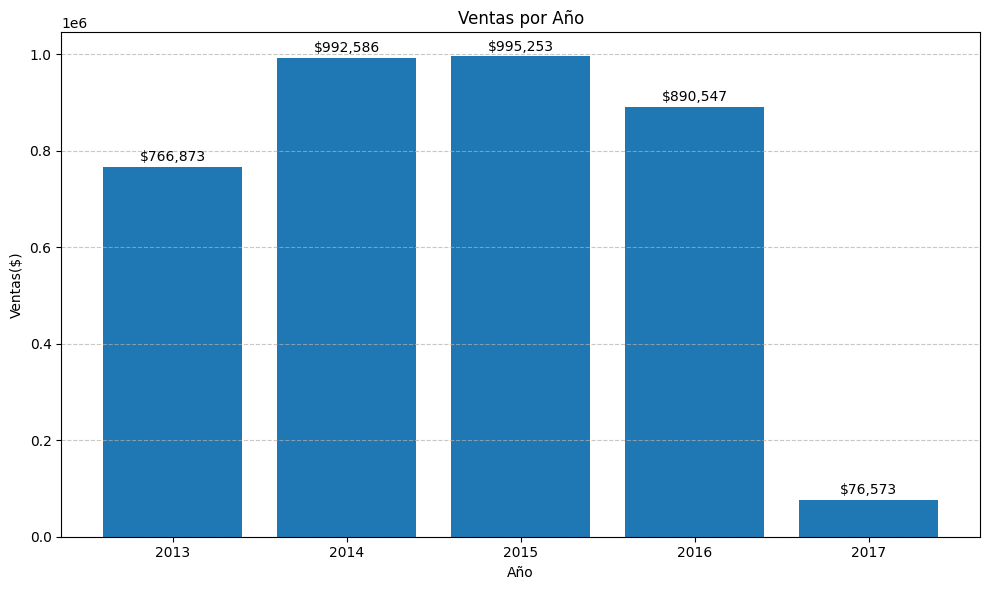

In [12]:
# Ventas por año
ventas_anuales = df.groupby('periodo')['Total'].sum().reset_index()
print("\nVentas totales por año:")
print(ventas_anuales)

plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_anuales['periodo'].astype(str), ventas_anuales['Total'])
plt.title('Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
            f'${height:,.0f}',
            ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()


Ventas por año y mes:
  periodo_mes      Total
0     2013-02   31874.37
1     2013-03   34953.17
2     2013-04   15468.78
3     2013-05  108712.11
4     2013-06  108847.89
5     2013-07  121133.29
6     2013-08   87920.60
7     2013-09   56843.14
8     2013-10   83069.75
9     2013-11   28681.07


<function matplotlib.pyplot.show(close=None, block=None)>

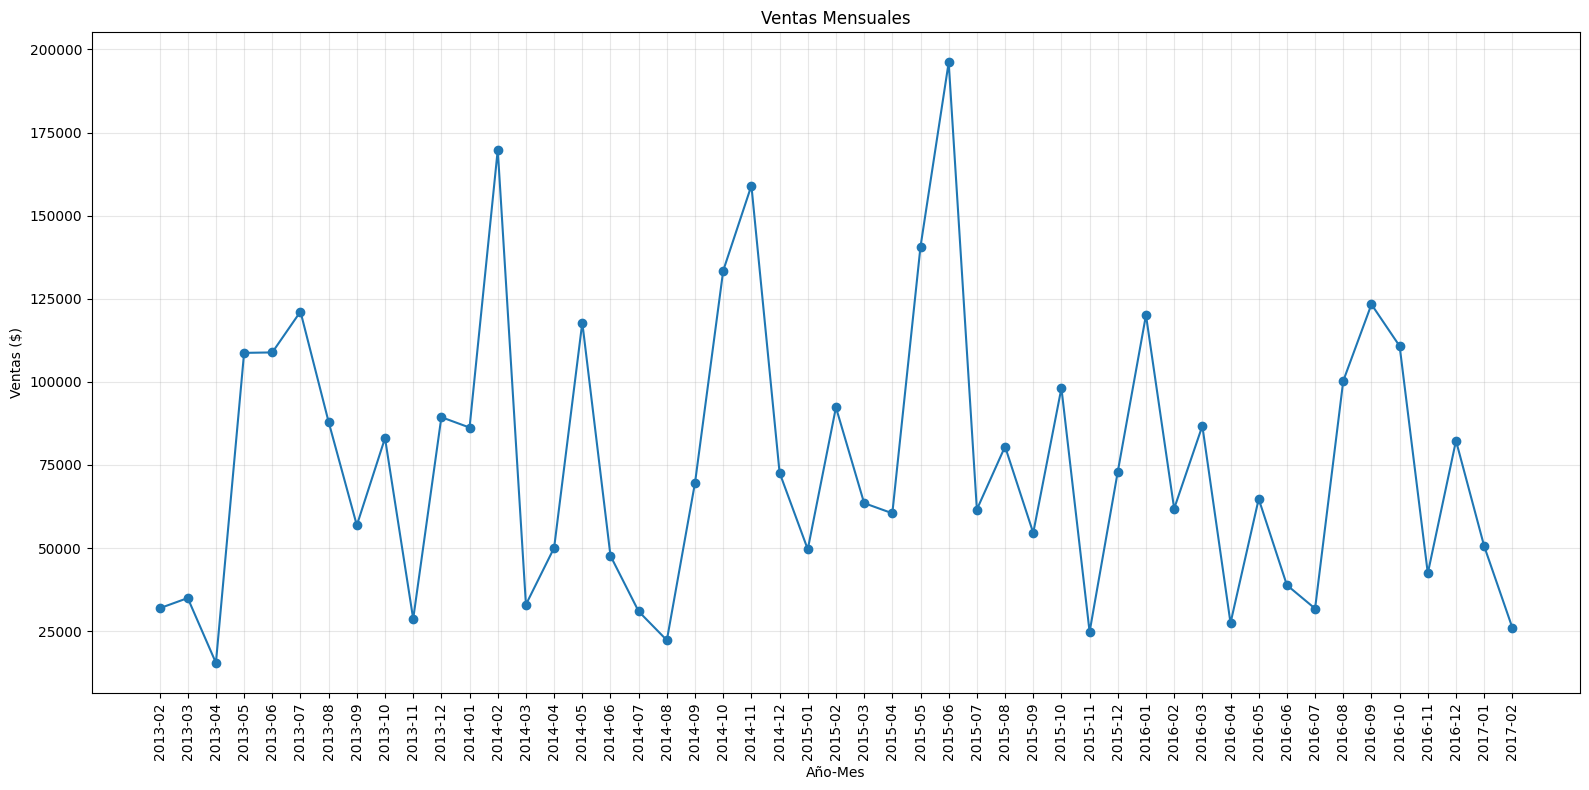

In [13]:
# Ventas por año y mes
ventas_periodo_mes = df.groupby('periodo_mes')['Total'].sum().reset_index()
ventas_periodo_mes = ventas_periodo_mes.sort_values('periodo_mes')
print("\nVentas por año y mes:")
print(ventas_periodo_mes.head(10))

plt.figure(figsize=(16, 8))
plt.plot(ventas_periodo_mes['periodo_mes'], ventas_periodo_mes['Total'], marker='o')
plt.title('Ventas Mensuales')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas ($)')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show


Categorías de productos más vendidos:
  Product Category       Total
1  Office Supplies  2917828.03
2       Technology   710496.56
0        Furniture    93508.04


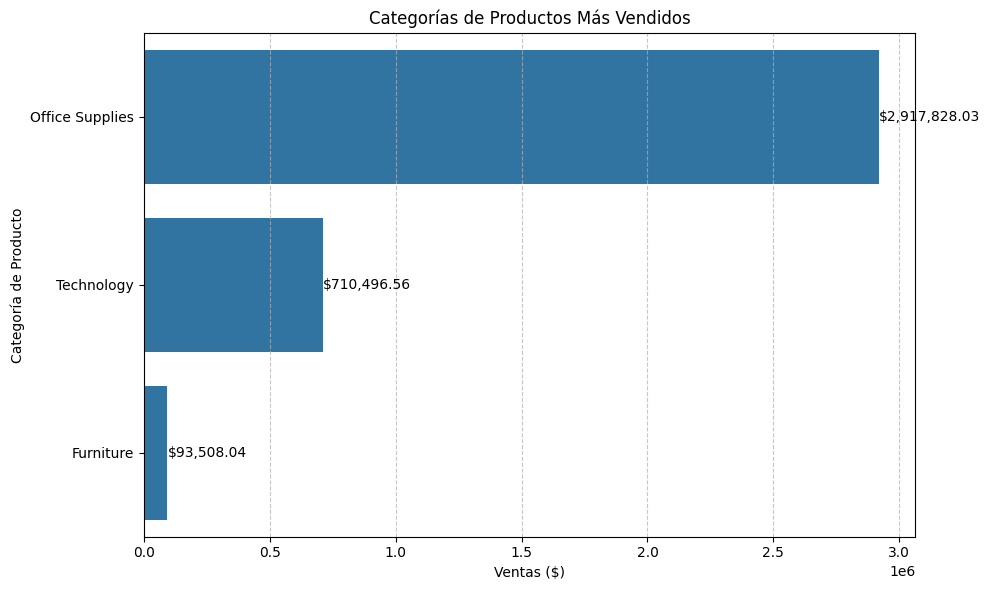

In [14]:
# Categorías más vendidas
categoria_ventas = df.groupby('Product Category')['Total'].sum().reset_index()
categoria_ventas = categoria_ventas.sort_values('Total', ascending=False)
print("\nCategorías de productos más vendidos:")
print(categoria_ventas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Total', y='Product Category', data=categoria_ventas)
plt.title('Categorías de Productos Más Vendidos')
plt.xlabel('Ventas ($)')
plt.ylabel('Categoría de Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto a cada barra
for i, v in enumerate(categoria_ventas['Total']):
    ax.text(v + 1000, i, f'${v:,.2f}', va='center')  # Formato con separadores de miles y 2 decimales

plt.tight_layout()
plt.show()


Productos más vendidos (top 10 por cantidad):
                                          Product Name      Total
131                                 Cando PC940 Copier  695199.82
168                           HFX LaserJet 3310 Copier  432414.11
30                Adesso Programmable 142-Key Keyboard  237575.05
252     UGen Ultra Professional Cordless Optical Suite  201337.72
180                                 Multimedia Mailers  117741.64
249                  UGen Ultra Cordless Optical Suite  111767.25
158                             Economy Rollaway Files  102319.74
161           Emerson Stylus 1520 Color Inkjet Printer   85456.96
247  TypeRight Side-Opening Peel & Seel Expanding E...   80846.92
27                                 600 Series Non-Flip   60530.63


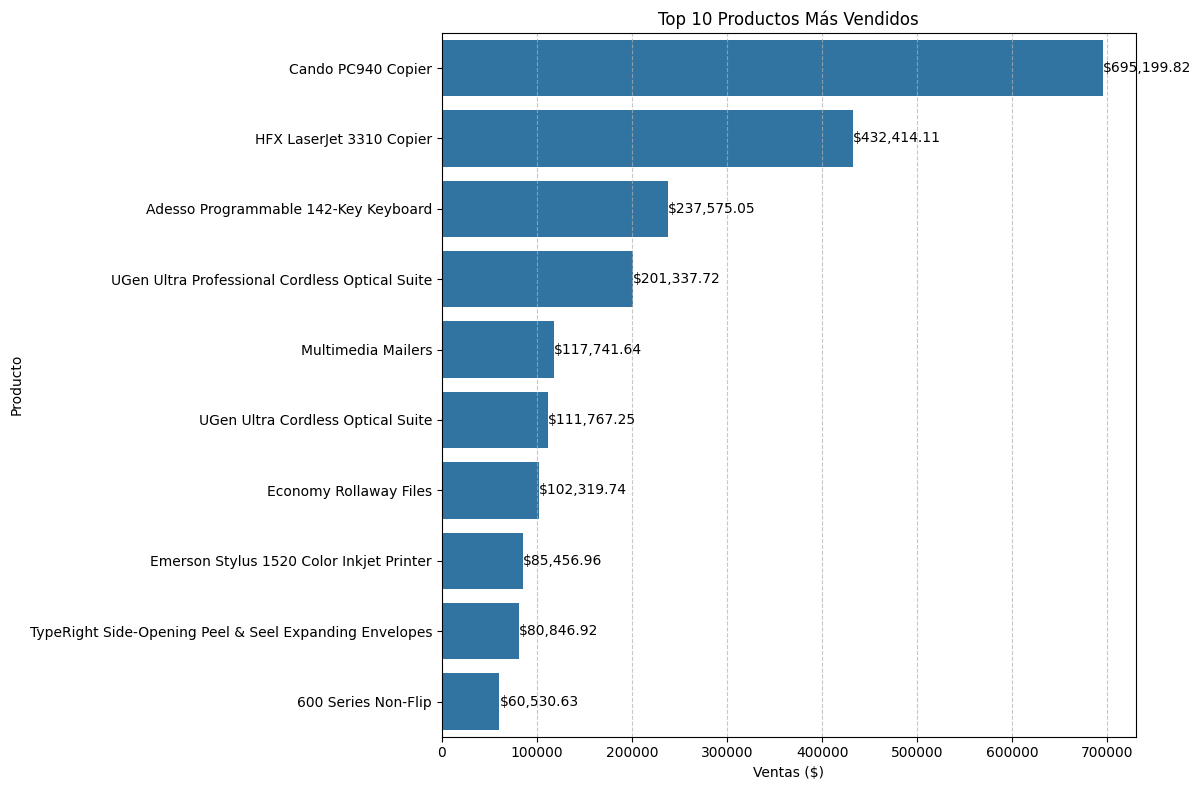

In [15]:
# Productos más vendidos (top 10 por cantidad)
productos_ventas = df.groupby('Product Name')['Total'].sum().reset_index()
productos_ventas = productos_ventas.sort_values('Total', ascending=False).head(10)
print("\nProductos más vendidos (top 10 por cantidad):")
print(productos_ventas)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Total', y='Product Name', data=productos_ventas)
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Ventas ($)')
plt.ylabel('Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto a cada barra
for i, v in enumerate(productos_ventas['Total']):
    ax.text(v + 100, i, f'${v:,.2f}', va='center')  # Formato con separadores de miles y 2 decimales

plt.tight_layout()
plt.show()

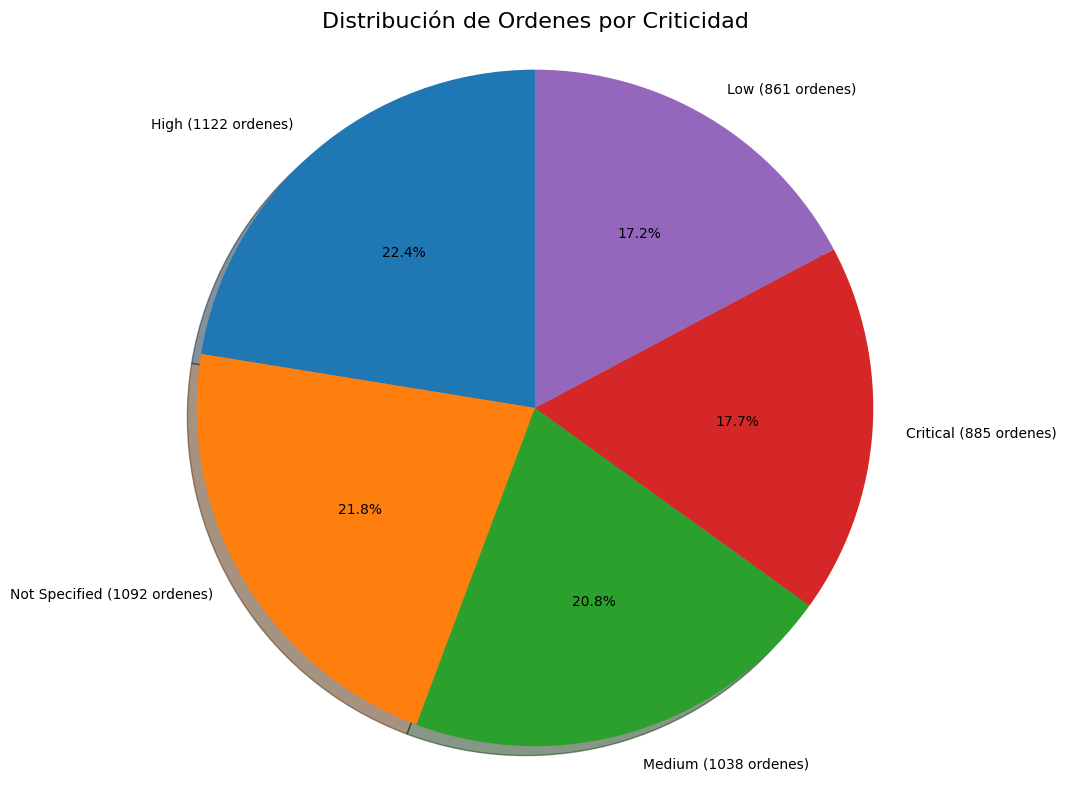

In [19]:
# Contar la cantidad de órdenes por criticidad
ordenes_por_prioridad = df['Order Priority'].value_counts().reset_index()
ordenes_por_prioridad.columns = ['Order Priority', 'Count']

# Crear un gráfico de pastel más simple
plt.figure(figsize=(10, 8))
plt.pie(ordenes_por_prioridad['Count'], 
        labels=[f"{priority} ({count} ordenes)" for priority, count in zip(ordenes_por_prioridad['Order Priority'], ordenes_por_prioridad['Count'])],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True)
plt.title('Distribución de Ordenes por Criticidad', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

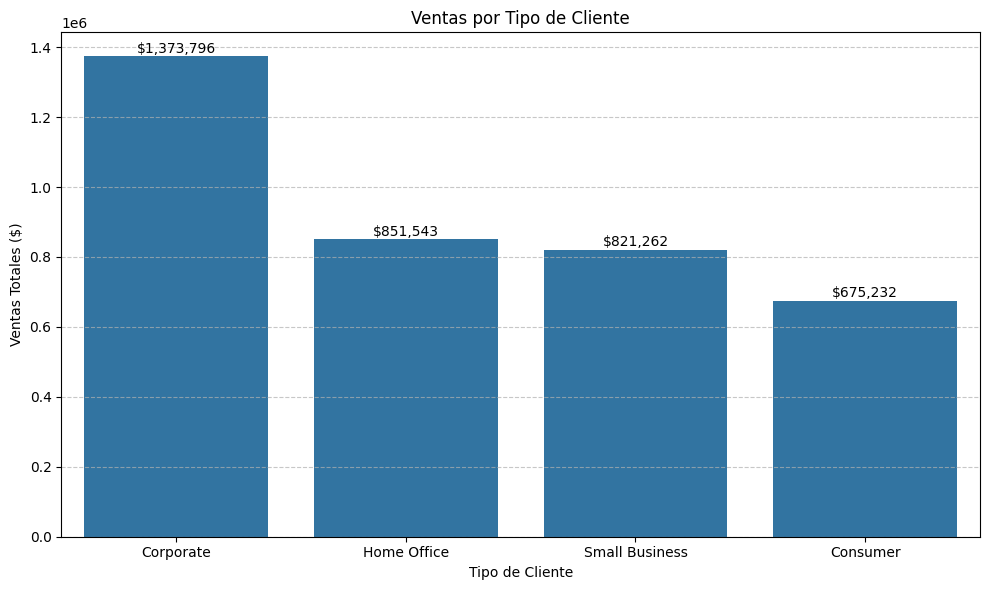

In [17]:
# Ventas por tipo de cliente
ventas_tipo_cliente = df.groupby('Customer Type')['Total'].sum().reset_index()
ventas_tipo_cliente = ventas_tipo_cliente.sort_values('Total', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Customer Type', y='Total', data=ventas_tipo_cliente)
plt.title('Ventas por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Ventas Totales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas
for i, v in enumerate(ventas_tipo_cliente['Total']):
    ax.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


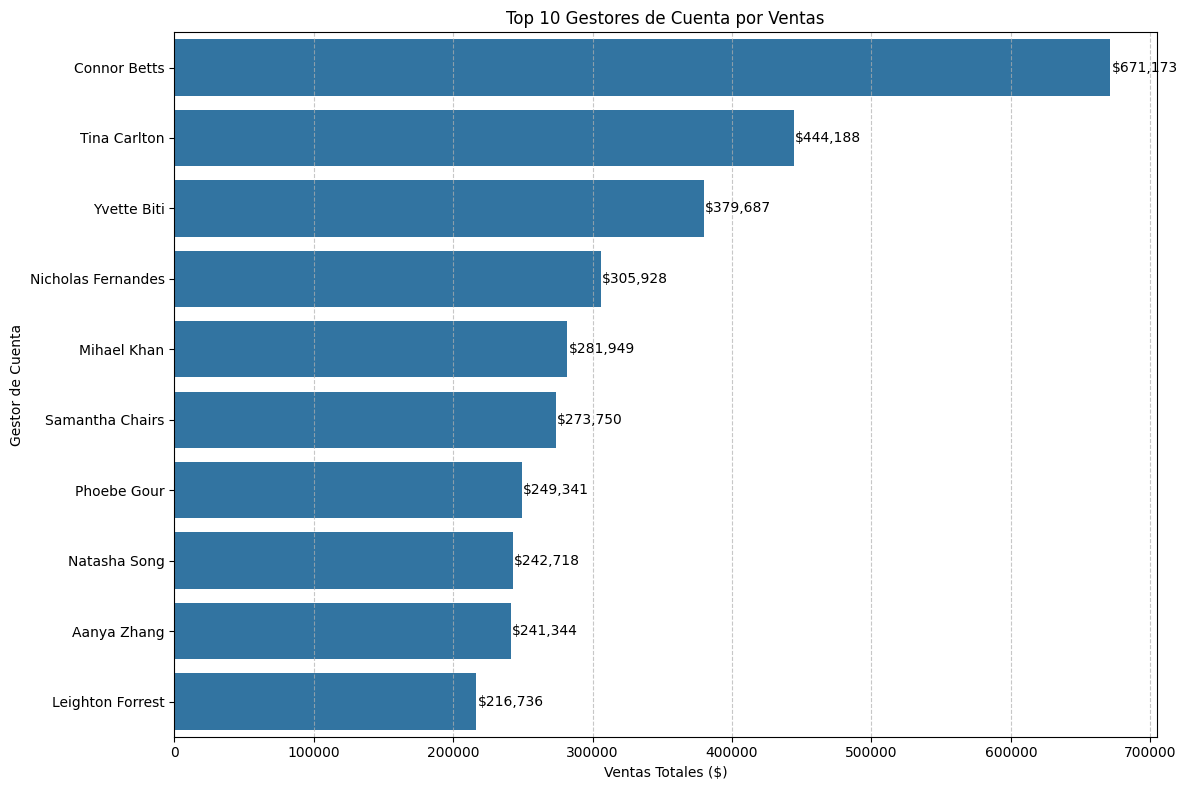

In [18]:
# Ventas por gestor de cuenta
ventas_gestor = df.groupby('Account Manager')['Total'].sum().reset_index()
ventas_gestor = ventas_gestor.sort_values('Total', ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Total', y='Account Manager', data=ventas_gestor)
plt.title('Top 10 Gestores de Cuenta por Ventas')
plt.xlabel('Ventas Totales ($)')
plt.ylabel('Gestor de Cuenta')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas
for i, v in enumerate(ventas_gestor['Total']):
    ax.text(v + 1000, i, f'${v:,.0f}', va='center')

plt.tight_layout()
plt.show()